In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [11]:
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

In [12]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
df.drop(['Genre'],axis=1,inplace=True)
df.drop(['Age'],axis=1,inplace=True)

In [18]:
df = df.sample(frac=1) #sampling data

In [19]:
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
191,192,103,69
23,24,25,73
77,78,54,48
90,91,59,55
130,131,71,9


In [75]:
k_means = KMeans(n_clusters = 5,max_iter=500)
k_means.fit(df)

KMeans(max_iter=500, n_clusters=5)

In [76]:
k_means.labels_

array([1, 4, 0, 0, 3, 0, 4, 0, 1, 1, 4, 1, 1, 3, 1, 3, 1, 3, 4, 0, 2, 0,
       0, 3, 2, 3, 3, 0, 3, 3, 4, 0, 2, 0, 2, 2, 4, 4, 0, 3, 2, 1, 1, 1,
       1, 2, 3, 0, 3, 3, 3, 1, 1, 0, 0, 0, 4, 4, 3, 3, 1, 4, 0, 4, 0, 2,
       1, 0, 1, 4, 1, 3, 1, 1, 4, 4, 1, 3, 4, 0, 1, 1, 0, 0, 0, 4, 0, 0,
       3, 4, 1, 4, 0, 0, 3, 0, 0, 2, 0, 2, 2, 2, 3, 4, 2, 1, 0, 1, 3, 1,
       0, 4, 0, 0, 3, 0, 4, 4, 4, 0, 3, 4, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       4, 4, 4, 0, 0, 3, 3, 4, 3, 2, 3, 4, 4, 4, 4, 1, 0, 0, 0, 0, 0, 4,
       3, 2, 0, 1, 0, 4, 2, 0, 1, 2, 0, 4, 0, 4, 2, 1, 2, 0, 4, 4, 3, 1,
       4, 1, 3, 0, 4, 0, 2, 4, 0, 1, 1, 3, 0, 0, 3, 4, 0, 4, 2, 3, 1, 2,
       3, 3], dtype=int32)

In [77]:
np.unique(k_means.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

In [78]:
centers = k_means.cluster_centers_
centers

array([[ 96.05084746,  59.05084746,  48.84745763],
       [162.        ,  86.53846154,  82.12820513],
       [ 23.        ,  26.30434783,  20.91304348],
       [164.        ,  87.91666667,  17.88888889],
       [ 39.11627907,  34.48837209,  65.81395349]])

In [79]:
centers[:,0]

array([ 96.05084746, 162.        ,  23.        , 164.        ,
        39.11627907])

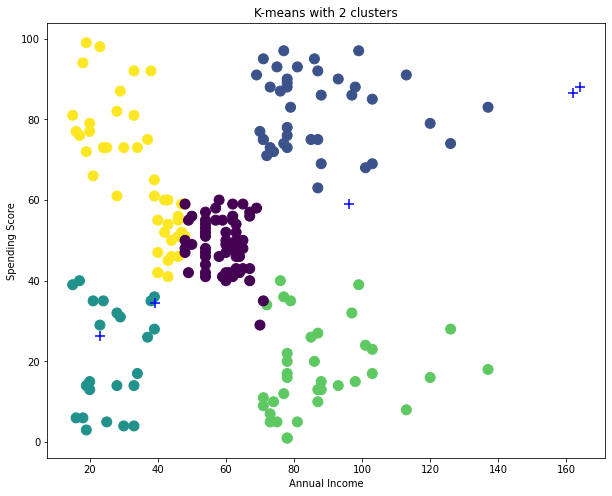

In [80]:
plt.figure(figsize=(10,8))
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means with 2 clusters')
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=k_means.labels_,s=100)
plt.scatter(centers[:,0],centers[:,1],color='blue',marker='+',s=100)


In [ ]:
# you may calculate silhouette score to know if no.of clusters are okay
#https://www.kaggle.com/abdulmeral/10-models-for-clustering